d:\AgenticAI\.venv\Scripts\python.exe
True


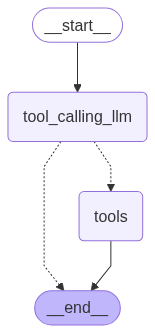

content='what is the recent ai news' additional_kwargs={} response_metadata={} id='d0ed4404-f61f-4ac8-9467-a9a88594cf12'
content='' additional_kwargs={'tool_calls': [{'id': 'd55m7d401', 'function': {'arguments': '{"query":"recent ai news","search_depth":"advanced","topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 117, 'prompt_tokens': 2204, 'total_tokens': 2321, 'completion_time': 0.186984229, 'prompt_time': 0.246152634, 'queue_time': 0.27272545400000003, 'total_time': 0.433136863}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--76a163b7-13c8-4d29-bd1d-961d604b2d5d-0' tool_calls=[{'name': 'tavily_search', 'args': {'query': 'recent ai news', 'search_depth': 'advanced', 'topic': 'news'}, 'id': 'd55m7d401', 'type': 'tool_call'}] usage_metadata={'input_tokens': 2204, 'output_tokens': 117, 'total_tokens': 2321}
content='{"query": "recent a

In [ ]:
from langchain_tavily import TavilySearch
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
from IPython.display import Image, display



class State(TypedDict):
    messages:Annotated[list,add_messages] ## add_message is acting as reducer

graph_builder=StateGraph(State)
graph_builder

import os 
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

import os
os.environ["GROQ_API_KEY"] = "GROQ_API_KEY"
llm = ChatGroq(model="llama3-8b-8192")
llm

llm = ChatGroq(model="llama3-8b-8192", api_key=os.environ["GROQ_API_KEY"])


tool  = TavilySearch(max_search=2)
tool.invoke("What is langgraph")

import sys
print(sys.executable)

import pkg_resources
installed_packages = {pkg.key for pkg in pkg_resources.working_set}
print('langchain-tavily' in installed_packages)


##Custom function
def multiply(a:int,b:int)->int:
    """Multiply a and b

    args:
         a(int): first int
         b(int): second int
        
    Returns:
        int:output int
    
    """

    return a*b




tools=[tool,multiply]
llm_with_tool=llm.bind_tools(tools)
llm_with_tool

### Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition



## Node Defination
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## create a graph
builder= StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## add edges 
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # if the latest messgaes (result) from assistant is a tool call ->tools_condition routes to tools
    # if the latest messgaes (result) from assistant is a not tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools",END)


##compile the graph
graph1 = builder.compile()
display(Image(graph1.get_graph().draw_mermaid_png()))

respone =graph1.invoke({"messages":"what is the recent ai news"})
respone['messages'][-1].content

for m in respone["messages"]:
    print(m)

In [19]:
respone =graph1.invoke({"messages":"what is the recent ai news"})
respone['messages'][-1].content

for m in respone["messages"]:
    print(m)

content='what is the recent ai news' additional_kwargs={} response_metadata={} id='3e6d0f75-41fa-4f00-8d57-66f8f0c243c4'
content='' additional_kwargs={'tool_calls': [{'id': 'je5k6m8ww', 'function': {'arguments': '{"query":"recent ai news","search_depth":"advanced","time_range":"day","topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 2204, 'total_tokens': 2297, 'completion_time': 0.1573562, 'prompt_time': 0.857905332, 'queue_time': 0.41268375300000015, 'total_time': 1.015261532}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_2717d04279', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--37770af5-176f-4946-9769-7b2f9794ad96-0' tool_calls=[{'name': 'tavily_search', 'args': {'query': 'recent ai news', 'search_depth': 'advanced', 'time_range': 'day', 'topic': 'news'}, 'id': 'je5k6m8ww', 'type': 'tool_call'}] usage_metadata={'input_tokens': 2204, 'output_tokens': 93, 'total_tokens'

In [16]:
respone['messages'][-1].content

'{"query": "recent ai news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.newsweek.com/nw-ai/ai-impact-awards-2025-science-engineering-2084754", "title": "AI Impact Awards 2025: The Changing Human Role in Science and Engineering - Newsweek", "score": 0.7318455, "published_date": "Wed, 25 Jun 2025 10:02:01 GMT", "content": "Newsweek _\\\\_will continue the conversation on meaningful AI innovations at our AI Impact Summit from June 23 to 25 in Sonoma, California. Click here to follow along on the live blog.\\\\__\\n\\nRequest Reprint & LicensingSubmit CorrectionView Editorial Guidelines\\n\\nSHARE:xfacebooklinkedinredditemailwhatsappCopy & Share\\n\\n✓ Link copied to clipboard!\\n\\nThe Latest in AI\\n----------------\\n\\nNEWSWEEK.AI\\n\\n06.09.25\\n\\n### Generative AI\'s Mission to Explore Strange New Worlds [...] ### AI Will Connect Mercedes-Benz Places Residents to the World\\n\\nThe new Miami condo complex will have state-of-the-art te

In [17]:
for m in respone["messages"]:
    print(m)

content='what is the recent ai news' additional_kwargs={} response_metadata={} id='d0ed4404-f61f-4ac8-9467-a9a88594cf12'
content='' additional_kwargs={'tool_calls': [{'id': 'd55m7d401', 'function': {'arguments': '{"query":"recent ai news","search_depth":"advanced","topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 117, 'prompt_tokens': 2204, 'total_tokens': 2321, 'completion_time': 0.186984229, 'prompt_time': 0.246152634, 'queue_time': 0.27272545400000003, 'total_time': 0.433136863}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--76a163b7-13c8-4d29-bd1d-961d604b2d5d-0' tool_calls=[{'name': 'tavily_search', 'args': {'query': 'recent ai news', 'search_depth': 'advanced', 'topic': 'news'}, 'id': 'd55m7d401', 'type': 'tool_call'}] usage_metadata={'input_tokens': 2204, 'output_tokens': 117, 'total_tokens': 2321}
content='{"query": "recent a

In [18]:
respone =graph1.invoke({"messages":"what is 2 multiply by 3"})
respone['messages'][-1].content

for m in respone["messages"]:
    print(m)

content='what is 2 multiply by 3' additional_kwargs={} response_metadata={} id='e51e4c32-8deb-43d9-96e8-918fc9ebf38e'
content='' additional_kwargs={'tool_calls': [{'id': 'sffxvxdgk', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 2206, 'total_tokens': 2278, 'completion_time': 0.115099858, 'prompt_time': 0.246128616, 'queue_time': 0.27270040399999995, 'total_time': 0.361228474}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_2717d04279', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--b0edd141-075e-48e5-bce9-b404b56e46c3-0' tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': 'sffxvxdgk', 'type': 'tool_call'}] usage_metadata={'input_tokens': 2206, 'output_tokens': 72, 'total_tokens': 2278}
content='6' name='multiply' id='30926bc8-a96d-49ab-8c7c-ebb791529857' tool_call_id='sffxvxdgk'
